In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 

In [140]:
print(torch.__version__)

1.11.0


In [141]:
data = pd.read_csv('triplets_all.csv')
N = 878
J = torch.zeros((N, N))
for i in range(data.shape[0]):
    a, b = map(int, data.ids[i].split('_'))
    c = int(data.intersize[i])
    if a != b:
        J[a][b] = c
        J[b][a] = c
print(J)

tensor([[0., 5., 2.,  ..., 0., 0., 0.],
        [5., 0., 8.,  ..., 0., 0., 0.],
        [2., 8., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 3.],
        [0., 0., 0.,  ..., 0., 3., 0.]])


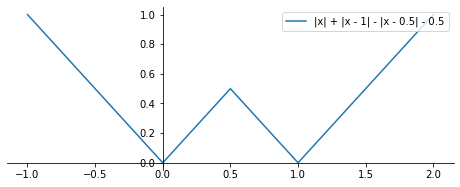

In [142]:
plt.figure(figsize=(8,3))
plt.plot([-1, 0, 0.5, 1, 2], [1, 0, 0.5, 0, 1], label = "|x| + |x - 1| - |x - 0.5| - 0.5")

plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

plt.legend(loc = "upper right")
plt.show()

In [143]:
p = torch.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            p[i][j] = 1

In [201]:
def custom_loss(G, J, reduction="sum", l=0):
    reg = (torch.abs(G) + torch.abs(G - 1) - torch.abs(G - 0.5) - 0.5).sum()
    sum = torch.nn.L1Loss(reduction=reduction)(torch.matmul(G, G.T) * p, J)
    return sum + reg * l
def AE(G, J):
    G_bin = (G > 0.5).float()
    return torch.nn.L1Loss(reduction="sum")(torch.matmul(G_bin, G_bin.T) * p, J)

In [202]:
n = 100
G = torch.zeros((N, n))
for i in range(N):
    for j in range(n):
        G[i][j] = np.random.rand()
G = (G > 0.18).float()
G.requires_grad = True

In [203]:
optimizer = torch.optim.Adam([G], lr=0.0002)

In [206]:
for i in range(12001):
    optimizer.zero_grad()
    loss = custom_loss(G, J)
    loss.backward()
    optimizer.step()
    if (i % 100 == 0):
        print(float(AE(G, J)))

3189098.0
3075620.0
2974674.0
2875252.0
2783384.0
2703758.0
2622798.0
2557940.0
2496964.0
2436744.0
2392100.0
2346714.0
2307270.0
2271834.0
2237636.0
2204842.0
2172224.0
2146222.0
2124122.0
2105304.0
2088716.0
2072540.0
2061328.0
2054580.0
2054198.0
2050572.0
2046766.0
2042610.0
2041320.0
2042000.0
2039996.0
2041812.0
2045844.0
2051422.0
2061802.0
2071980.0
2090082.0
2103644.0
2114532.0


KeyboardInterrupt: 